## Chi Squared Distribution
<br>
The chi-square distribution 
(also chi-squared or χ2-distribution) 
with k degrees of freedom 
<br>is the distribution of a sum of the squares 
of k independent standard normal random variables:

 - https://en.wikipedia.org/wiki/Chi-square_distribution

<br>$ \Large {\chi}^2 \sim \sum_{k=1}^{n} \frac{(O_k - E_k)^2}{E_k} $
<br>

Where O = Observed, E = Estimated

This distribution is used as a foundation for:
 - goodness of fit test
 - test of independence or homogeneity

Karl Pearson introduced the "goodness of fit" test in his original paper in 1900:
 - http://www.economics.soton.ac.uk/staff/aldrich/1900.pdf


In [1]:
import sys,os
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

data type: <class 'numpy.ndarray'>
data: [2.41546367 0.07455055 0.2601672  0.33194796]


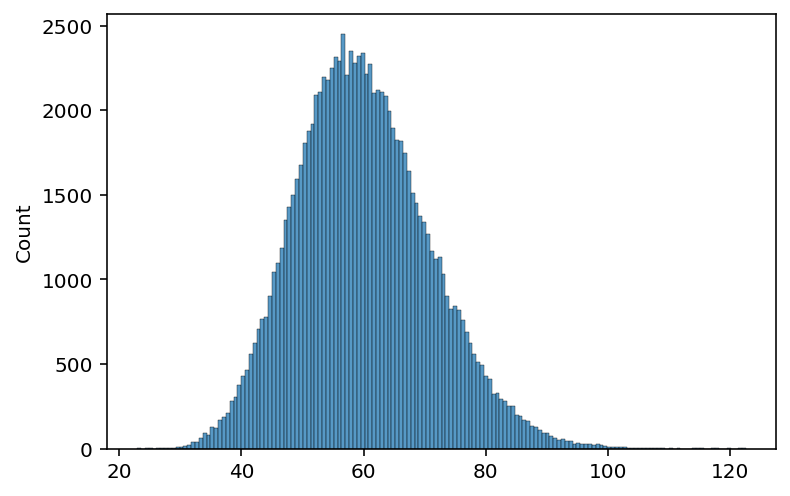

In [2]:
# numpy has a function to generate data with chisquare distribution
mydata = np.random.chisquare(2,4) # df, size = > np.array
print("data type:",type(mydata))   
print("data:",mydata)
#sns.distplot(np.random.chisquare(df=60, size=100000), hist=True)
sns.histplot(np.random.chisquare(df=60, size=100000))
plt.show();

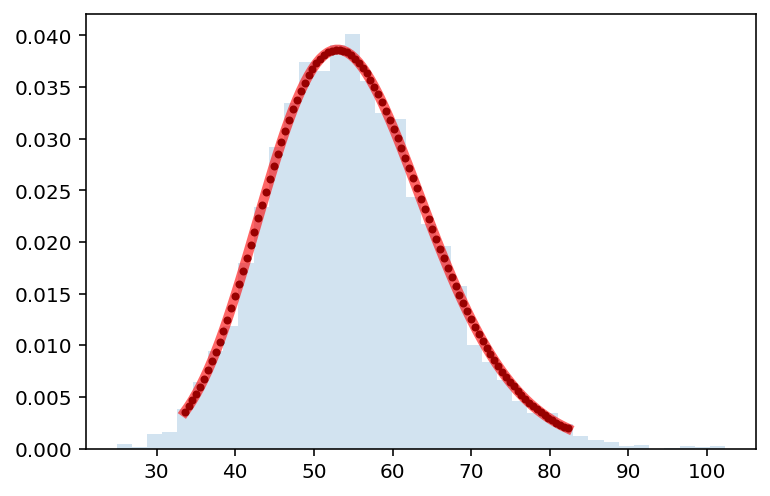

In [3]:
# scipy.stats has functions
# distribution:
# https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2.html
# chi-square test:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
# main terminology:
# https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html
#     rv: random variable
#     rvs: Random Variates
#     pdf: Probability Density Function
#     cdf: Cumulative Distribution Function
#     sf: Survival Function (1-CDF)
#     ppf: Percent Point Function (Inverse of CDF)
#     isf: Inverse Survival Function (Inverse of SF)
#     stats: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis
#     moment: non-central moments of the distributio

fig, ax = plt.subplots(1, 1)

mydf   = 55     # df = degrees of freedom
mysize = 10000  # number of points
x = np.linspace(chi2.ppf(0.01, mydf), chi2.ppf(0.99, mydf), 100)
rv = chi2(mydf)   # rv = random variables
r = chi2.rvs(mydf, size=mysize)
ax.plot(x, rv.pdf(x), 'k.', lw=2, label='frozen pdf')
ax.plot(x, chi2.pdf(x, mydf), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
ax.hist(r, bins=40, density=True, histtype='stepfilled', alpha=0.2)
_ = plt.show();

fast vectorized data generation


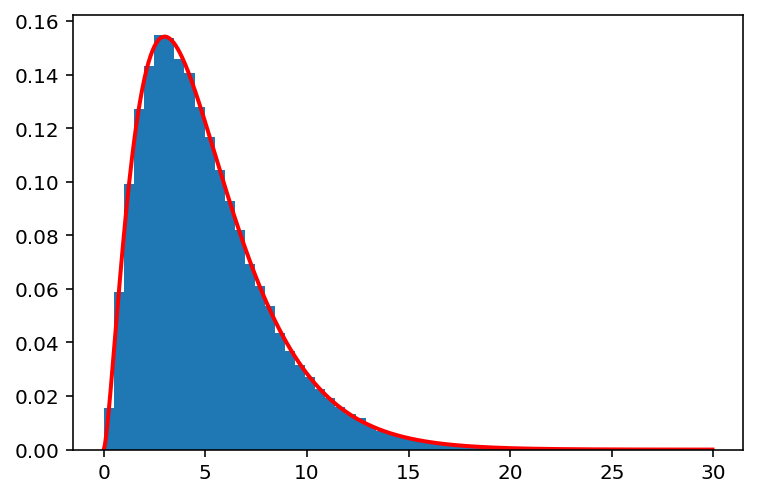

In [4]:
# Direct calculation of PDF for chi-squared distribution
mynorm = stats.norm(0, 1)
mysize = 100000
mydf = 5
mysum = np.zeros(mysize)

calc_by_vectors = True

if calc_by_vectors:
    print("fast vectorized data generation")
    for ii in range(mydf):
        mysum += mynorm.rvs(size=mysize)**2
else:
    print("one-by-one slow data generation")
    mylist = []
    for ss in range(mysize):
        ms = 0                       # calc sum of squares
        for ii in range(mydf):
            ms += np.random.randn() ** 2
        mylist.append(ms)           # add this sum to a list
    mysum = np.array(mylist)    

# --------------------------------------
# Plot histogram of generated values
_ = plt.hist(mysum, 60, density=True)

# --------------------------------------
# Plot the theoretical density of f
x = np.arange(0, 30, .05)
_ = plt.plot(x, stats.chi2.pdf(x, df=mydf), color='r', lw=2)
_ = plt.show();

In [5]:
# chi-square test
# https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
    
f_observed = [16, 18, 16, 14, 12, 12]
f_expected = [16, 16, 16, 16, 16, 8]
chi2_stat, p_val = stats.chisquare(f_observed, f_expected)

print(f"Chi2 Statistics    : {chi2_stat:.4f}")
print(f"P-Value            : {p_val:0.4f}")

Chi2 Statistics    : 3.5000
P-Value            : 0.6234


In [6]:
# running chi-square test for a dice
# https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b

# We do 4 samples of die rolls manually
# The first 3 samples were 35 rolls each, 
# and the last sample as 45 rolls

#     35  35  35  45  # totals
a1 = [ 6,  4,  5, 10]
a2 = [ 8,  5,  3,  3]
a3 = [ 5,  4,  8,  4]
a4 = [ 4, 11,  7, 13]
a5 = [ 5,  8,  7,  6]
a6 = [ 7,  3,  5,  9]

dice = np.array([a1, a2, a3, a4, a5, a6])

chi2_stat, p_val, dof, ex = stats.chi2_contingency(dice)
print(f"Chi2 Statistics    : {chi2_stat:.4f}")
print(f"Degrees of Freedom : {dof}")
print(f"P-Value            : {p_val:0.4f}")
print(f"Contingency Table  : ")
print(ex)

Chi2 Statistics    : 16.4906
Degrees of Freedom : 15
P-Value            : 0.3502
Contingency Table  : 
[[ 5.83333333  5.83333333  5.83333333  7.5       ]
 [ 4.43333333  4.43333333  4.43333333  5.7       ]
 [ 4.9         4.9         4.9         6.3       ]
 [ 8.16666667  8.16666667  8.16666667 10.5       ]
 [ 6.06666667  6.06666667  6.06666667  7.8       ]
 [ 5.6         5.6         5.6         7.2       ]]


In [7]:
# Chi-squared for flipping the coin
# (note how chi-squared widely changes between experiments)
for ii in range(20):
    N=50000
    half = N/2
    arr = np.random.choice([0, 1], size=N, p=[.5, .5])

    n1 = arr.sum()
    n0 = N-n1
    
    x2 = (n0-half)**2/n0 + (n1-half)**2/n1
    print(f"{x2:.3f}")

0.077
0.018
0.474
0.251
0.092
0.169
0.141
1.171
0.004
0.005
0.462
0.899
0.487
0.092
0.499
0.110
0.054
0.662
0.001
2.478
